* Montando NN no Pytorch
* Montando MLP - com dataloader
* Montando VAE no Pytorch - com dataloader
* VAE CNN Pytorch
* VAE para Sequência

In [ ]:
import torch
from torch import nn, Tensor
from torch.nn import functional as F

from typing import List

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

from torchvision import transforms, utils
import os
from PIL import Image
import matplotlib.pyplot as plt

# Criando topologia Pytorch

* nn.Module
* Ao herdar a classe nn.Module é necessário implementar a função forward

    * forward : submete uma entrada por todas as camadas e gera uma saída
    
* zero_grad limpa gradientes antigos da última etapa (caso contrário, você apenas acumula os gradientes de todas as chamadas loss.backward ()).

* loss.backward () calcula a derivada da perda usando a retropropagação.

* opt.step () faz com que o otimizador dê um passo com base nos gradientes dos parâmetros.


# abaixo é usado o nn.Module para construir uma rede neural
* cria duas camadas tipo do linear (que aplica uma transformação linear nos dados)
* A função forward define a sequência com a qual a entrada passa pelas camadas
    * Nesse caso começa pela camada fc1 e termina na camada fc2 (que está diretamente conectada

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,2)
        self.fc2 = nn.Linear(2,1)
    def forward(self, x):
        x = self.fc2(F.relu(self.fc1(x)))
        return x

# configura classe que herda nn.Module para ser executada na GPU

In [4]:
net = Net().cuda()

In [5]:
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [6]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.2985],
        [ 0.9855]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.4623, -0.2539], device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.4661, -0.0321]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.5090], device='cuda:0', requires_grad=True)]


In [ ]:
# cria classes de otimização e loss


In [7]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
criterion = nn.MSELoss()

# carrega dados

In [8]:
data = [(1,3), (2,6), (3,9), (4,12), (5,15), (6,18)]

# Treina o modelo
* Depois de criar a rede neural é necessário criar um loop para treinar o modelo (cada iteração é uma época)
    * Dentro de uma época é montado um loop para percorrer os dados (Normalmente com base no tamanho do batch)
       * Carrega os dados
       * optimizer.zero_grad() : zera valores de gradiente
       * y_pred = net(X): realiza predição do modelo
       * output = criterion(y_pred, Y): calcula loss
       * output.backward() : retropropagacao dos pesos
       * optimizer.step(): executa um passo do otimizador

In [9]:
for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2) # obtem cada posição do array data
        X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y]), requires_grad=False).cuda()
        optimizer.zero_grad()
        y_pred = net(X)
        output = criterion(y_pred, Y)
        output.backward()
        optimizer.step()

        print("Epoch ", epoch)

Epoch 0 - loss: 265.63555908203125
Epoch 20 - loss: 0.005114816129207611
Epoch 40 - loss: 0.0033118324354290962
Epoch 60 - loss: 0.002241474110633135
Epoch 80 - loss: 0.0015881932340562344


# percorre os dados de entrada para fazer predições
* predição no modelo basta chamar a classe com um valor compatível com o tamanho da entrada

In [10]:
for i, data2 in enumerate(data):
    X, Y = iter(data2)
    print('i, X, Y ',i, X, Y)

    X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y]), requires_grad=False).cuda()

    ypred=net(X)
    print('X, Y, ypred ',X, Y, ypred)

i  0
X  1
Y  3
X  tensor([1.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([3.], device='cuda:0')
ypred  tensor([3.0156], device='cuda:0', grad_fn=<AddBackward0>)
i  1
X  2
Y  6
X  tensor([2.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([6.], device='cuda:0')
ypred  tensor([5.9426], device='cuda:0', grad_fn=<AddBackward0>)
i  2
X  3
Y  9
X  tensor([3.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([9.], device='cuda:0')
ypred  tensor([8.9615], device='cuda:0', grad_fn=<AddBackward0>)
i  3
X  4
Y  12
X  tensor([4.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([12.], device='cuda:0')
ypred  tensor([11.9805], device='cuda:0', grad_fn=<AddBackward0>)
i  4
X  5
Y  15
X  tensor([5.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([15.], device='cuda:0')
ypred  tensor([14.9994], device='cuda:0', grad_fn=<AddBackward0>)
i  5
X  6
Y  18
X  tensor([6.], device='cuda:0', grad_fn=<CopyBackwards>)
Y  tensor([18.], device='cuda:0')
ypred  tensor([18.0183], device

# criando MLP Pytorch para mnist
* apresentando dataloader
* para criar um dataloader é necessário herdar a classe Dataset
* from torch.utils.data import DataLoader, Dataset

* A classe Dataset exige que seja implementado os métodos __len__ e __getitem__
* O objeto transformador converte do formato da entrada para o formato válido pelo tensorflow

In [93]:
class MNIST(Dataset):
    def __init__(self, X, y=None, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X.index)
    
    def __getitem__(self, index):
        image = self.X.iloc[index, ].values.astype(np.uint8).reshape((28, 28, 1))

        if self.transform is not None:
            image = self.transform(image)
            
        if self.y is not None:
            return image, self.y.iloc[index]
        else:
            return image


In [94]:
train_df = pd.read_csv('/home/silvio/git/datasets/mnistCSV/mnist_test.csv')

print('train data shape : ', train_df.shape)

train data shape :  (10000, 785)


In [95]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(train_df.iloc[:, 1:], train_df['label'], test_size=1/6, random_state=42)

print('train image shape : ', X_train.shape)
print('train label shape : ', y_train.shape)
print('valid image shape : ', X_valid.shape)
print('valid label image : ', y_valid.shape)

train image shape :  (8333, 784)
train label shape :  (8333,)
valid image shape :  (1667, 784)
valid label image :  (1667,)


# Para utilizar no Pytorch é necessário converter para toTensor

* transform=transforms.ToTensor()
* O DataLoader é uma classe do Pytorch que permite percorrer elementos em objeto controlado pela classe dataset considerando diversos aspectos:
    * batch size
    * shuffle para misturar os elementos
    * num_workers: explora execução concorrente para gerar batches

In [96]:
train_dataset = MNIST(X=X_train, y=y_train, transform=transforms.ToTensor())
valid_dataset = MNIST(X=X_valid, y=y_valid, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=128, shuffle=False, num_workers=0)

'\ntrain_loader = DataLoader(dataset=train_dataset,\n                          batch_size=batch_size,\n                          shuffle=True,\n                          num_workers=4)\n'

# construindo rede neural no pytorch usando modelo sequential
* Na função forward para definir como a entrada passa pelas camadas, basta usar o atributo que contém o objeto nn.Sequential

In [97]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        # convert tensor (128, 1, 28, 28) --> (128, 1*28*28)
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [98]:
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [99]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [100]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 15

for epoch in range(epochs):
    model.train()
    
    # armazena o loss gerado a cada época
    train_losses = []
    valid_losses = []
    
    for i, (images, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        # adciona loss obtido na lista
        train_losses.append(loss.item())
        
        if (i * 128) % (128 * 100) == 0:
            print(f'{i * 128} / 50000')

    # calcula o loss da base de validação        
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(valid_loader):
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            # calcula acurácia do modelo
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = 100*correct/total
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))


0 / 50000
epoch : 1, train loss : 1.1350, valid loss : 0.4874, valid acc : 87.52%
0 / 50000
epoch : 2, train loss : 0.4144, valid loss : 0.3504, valid acc : 89.92%
0 / 50000
epoch : 3, train loss : 0.3272, valid loss : 0.3110, valid acc : 90.40%
0 / 50000
epoch : 4, train loss : 0.2760, valid loss : 0.2918, valid acc : 91.42%
0 / 50000
epoch : 5, train loss : 0.2398, valid loss : 0.2703, valid acc : 91.24%
0 / 50000
epoch : 6, train loss : 0.2177, valid loss : 0.2659, valid acc : 91.96%
0 / 50000
epoch : 7, train loss : 0.1976, valid loss : 0.2440, valid acc : 92.74%
0 / 50000
epoch : 8, train loss : 0.1756, valid loss : 0.2375, valid acc : 92.62%
0 / 50000
epoch : 9, train loss : 0.1600, valid loss : 0.2394, valid acc : 92.26%
0 / 50000
epoch : 10, train loss : 0.1481, valid loss : 0.2227, valid acc : 92.92%
0 / 50000
epoch : 11, train loss : 0.1343, valid loss : 0.2256, valid acc : 92.80%
0 / 50000
epoch : 12, train loss : 0.1233, valid loss : 0.2219, valid acc : 92.86%
0 / 50000
epo

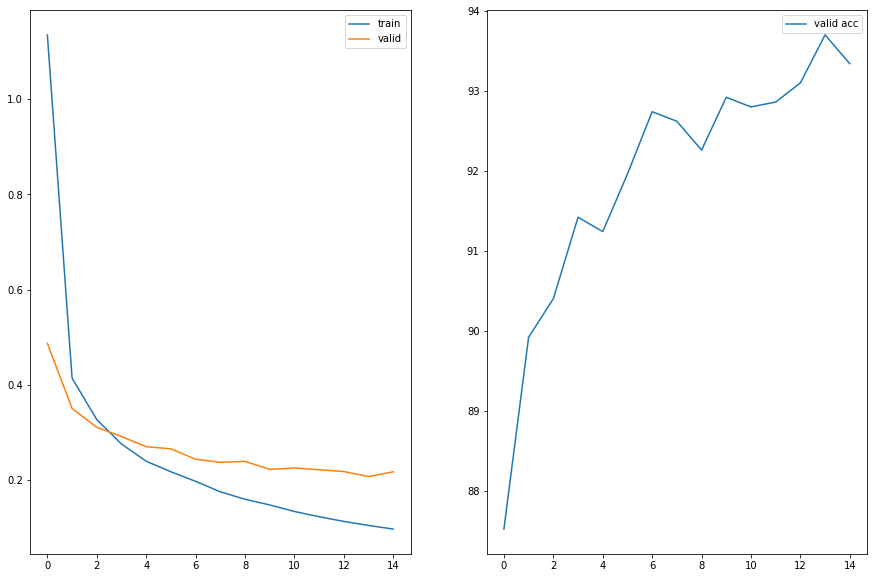

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(valid_acc_list, label='valid acc')
ax2.legend()

# realizando predições
* percorrendo valid_loader

In [81]:
test_preds = torch.LongTensor()

for i, (images, labels) in enumerate(valid_loader):
    outputs = model(images)
    
    pred = outputs.max(1, keepdim=True)[1]
    test_preds = torch.cat((test_preds, pred), dim=0)
    
out_df = pd.DataFrame()
out_df['ID'] = np.arange(1, len(X_valid.index)+1)
out_df['label'] = test_preds.numpy()

out_df.head()

,ID,label
0,1,6
1,2,2
2,3,3
3,4,7
4,5,2


# criando VAE com camadas CNN
* Obtendo dados de outra fonte
* Navegando pelos dados pelo dataloader

In [27]:
batch_size = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Classe para controlar a leitura de dados com base em Dataloader
* Dataloader abrem apenas os arquivos relacionados com o lote de treino
* economiza memoria e aumenta o uso de recursos da GPU
* Dataloader herda o tipo Dataset do pytorch

In [28]:
class DogDataset(Dataset):
    def __init__(self, img_dir, transform1=None, transform2=None):

        # Define diretório com imagens
        self.img_dir = img_dir
        #nomes das imagens
        self.img_names = os.listdir(img_dir)
        self.transform1 = transform1
        self.transform2 = transform2
        
        # armazena todos os nomes de arquivo de imagem do diretório
        self.imgs = []
        for img_name in self.img_names:
            img = Image.open(os.path.join(img_dir, img_name))
            
            if self.transform1 is not None:
                img = self.transform1(img)
                
            self.imgs.append(img)
            
    # função a ser usada no iterador
    def __getitem__(self, index):
        img = self.imgs[index]
        # aplica um transformador pré-definido
        if self.transform2 is not None:
            img = self.transform2(img)
        
        return img

    def __len__(self):
        return len(self.imgs)

# Depois de implementada a classe de leitura, é possível 
* Controlar a navegação pelos arquivos
* Aplicar transformações nas imagens
* A primeira transformação realiza: 
    * resize : modifica tamanho da imagem
    * center crop:

* transform 2:
    * RandomHorizontalFlip: flips horizontais aleatórios na imagem
    * rotações aletaórias
    * Normalização

In [48]:
# First preprocessing of data
transform1 = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64)])

# Data augmentation and converting to tensors
random_transforms = [transforms.RandomRotation(degrees=10)]
transform2 = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomApply(random_transforms, p=0.3), 
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
                                 
#train_dataset = DogDataset(img_dir='/home/silvio/git/datasets/dogs/dogs',
#train_dataset = DogDataset(img_dir='/home/silvio/git/celeba/img_align_celeba/img_align_celeba/',
train_dataset = DogDataset(img_dir='/home/silvio/git/datasets/celeba/img/',                    
                           transform1=transform1,
                           transform2=transform2)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=4)

In [ ]:
# abaixo um exemplo de leitura dos arquivos

ValueError: axes don't match array

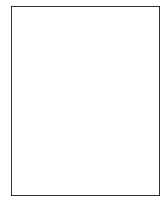

In [103]:
x = next(iter(train_loader))

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(x):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    
    img = img.numpy().transpose(1, 2, 0)
    plt.imshow((img+1.)/2.)

# abaixo uma VAE CNN para gerar novas imagens
* Essa CNN é capaz de gerar dados para datasets com todas as imagens de mesmo tamanho

* Parametros:
    * Número de amostras
    * Tamanho de batch
    * canais
    * tamanho do espaço latente

* criando camada de covolução para VAE convlayer_enc
    * cria camada de convolução e aplica normalização 2d 
    * No final cria o espaço latente com camada de convolução 2d
    * reparameterize: função para criar a função de distribuição no espaço latente
    * loss usa divergencia KL e binary_cross_entropy

In [50]:
class VAE(nn.Module):
    def __init__(self, latent_dim=128, no_of_sample=10, batch_size=32, channels=3):
        super(VAE, self).__init__()
        
        self.no_of_sample = no_of_sample
        self.batch_size = batch_size
        self.channels = channels
        self.latent_dim = latent_dim
        
        
        # Encoder
        def convlayer_enc(n_input, n_output, k_size=4, stride=2, padding=1, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block
        
        self.encoder = nn.Sequential(
            *convlayer_enc(self.channels, 64, 4, 2, 2),               # (64, 32, 32)
            *convlayer_enc(64, 128, 4, 2, 2),                         # (128, 16, 16)
            *convlayer_enc(128, 256, 4, 2, 2, bn=True),               # (256, 8, 8)
            *convlayer_enc(256, 512, 4, 2, 2, bn=True),               # (512, 4, 4)
            nn.Conv2d(512, self.latent_dim*2, 4, 1, 1, bias=False),   # (latent_dim*2, 4, 4)
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        
        # Decoder
        def convlayer_dec(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block
        
        self.decoder = nn.Sequential(
            *convlayer_dec(self.latent_dim, 512, 4, 2, 1),           # (512, 8, 8)
            *convlayer_dec(512, 256, 4, 2, 1),                       # (256, 16, 16)
            *convlayer_dec(256, 128, 4, 2, 1),                       # (128, 32, 32)
            *convlayer_dec(128, 64, 4, 2, 1),                        # (64, 64, 64)
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),          # (3, 64, 64)
            nn.Sigmoid()
        )

    def encode(self, x):
        '''return mu_z and logvar_z'''
        x = self.encoder(x)
        return x[:, :self.latent_dim, :, :], x[:, self.latent_dim:, :, :]
    
    def decode(self, z):
        z = self.decoder(z)
        # quantidade de amostras passadas tamanho 3 canais tamanho 64 x 64
        return z.view(-1, 3 * 64 * 64)

    def reparameterize(self, mu, logvar):
        if self.training:


            sample_z = []
            for _ in range(self.no_of_sample):
                std = logvar.mul(0.5).exp_()
                eps = Variable(std.data.new(std.size()).normal_())
                sample_z.append(eps.mul(std).add_(mu))
            return sample_z
        
        else:
            return mu

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        
        if self.training:
            return [self.decode(z) for z in z], mu, logvar
        else:
            return self.decode(z), mu, logvar

    def loss_function(self, recon_x, x, mu, logvar):

        if self.training:
            BCE = 0
            for recon_x_one in recon_x:
                BCE += F.binary_cross_entropy(recon_x_one, x.view(-1, 3 * 64 * 64))
            BCE /= len(recon_x)
        else:
            BCE = F.binary_cross_entropy(recon_x, x.view(-1, 3 * 64 * 64))
        
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        KLD /= self.batch_size * 3 * 64 * 64

        return BCE + KLD

# parametriza a execucao da NN

In [51]:
epochs = 50
latent_dim = 32

model = VAE(latent_dim, batch_size=batch_size).to(device)
optimizer = torch.optim.Adam(model.parameters())# , lr=lr)

# Loop que percorre as epocas
* Primeiro loop percorre as épocas
* segundo loop percorre os dados pelo dataloader

In [52]:
for epoch in range(1, epochs+1):
    model.train()
    print(f'Epoch {epoch} start')
    
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        recon_batch, mu, logvar = model(data)
        loss = model.loss_function(recon_batch, data, mu, logvar)

        loss.backward()
        optimizer.step()
        
    #model.eval()
    #recon_img, _, _ = model(x[:1].to(device))
    #img = recon_img.view(3, 64, 64).detach().cpu().numpy().transpose(1, 2, 0)
    
    #plt.imshow((img+1.)/2.)
    #plt.show()

Epoch 1 start
Epoch 2 start
Epoch 3 start
Epoch 4 start
Epoch 5 start
Epoch 6 start
Epoch 7 start
Epoch 8 start
Epoch 9 start
Epoch 10 start
Epoch 11 start
Epoch 12 start
Epoch 13 start
Epoch 14 start
Epoch 15 start
Epoch 16 start
Epoch 17 start
Epoch 18 start
Epoch 19 start
Epoch 20 start
Epoch 21 start
Epoch 22 start
Epoch 23 start
Epoch 24 start
Epoch 25 start
Epoch 26 start
Epoch 27 start
Epoch 28 start
Epoch 29 start
Epoch 30 start
Epoch 31 start
Epoch 32 start
Epoch 33 start
Epoch 34 start
Epoch 35 start
Epoch 36 start
Epoch 37 start
Epoch 38 start
Epoch 39 start
Epoch 40 start
Epoch 41 start
Epoch 42 start
Epoch 43 start
Epoch 44 start
Epoch 45 start
Epoch 46 start
Epoch 47 start
Epoch 48 start
Epoch 49 start
Epoch 50 start


In [104]:
reconstructed, mu, _ = model(x.to(device))
#reconstructed = reconstructed.view(-1, 3, 64, 64).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(reconstructed):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img+1.)/2.)


AttributeError: 'list' object has no attribute 'to'

# percorre o espaco latente transformando entradas para imagens

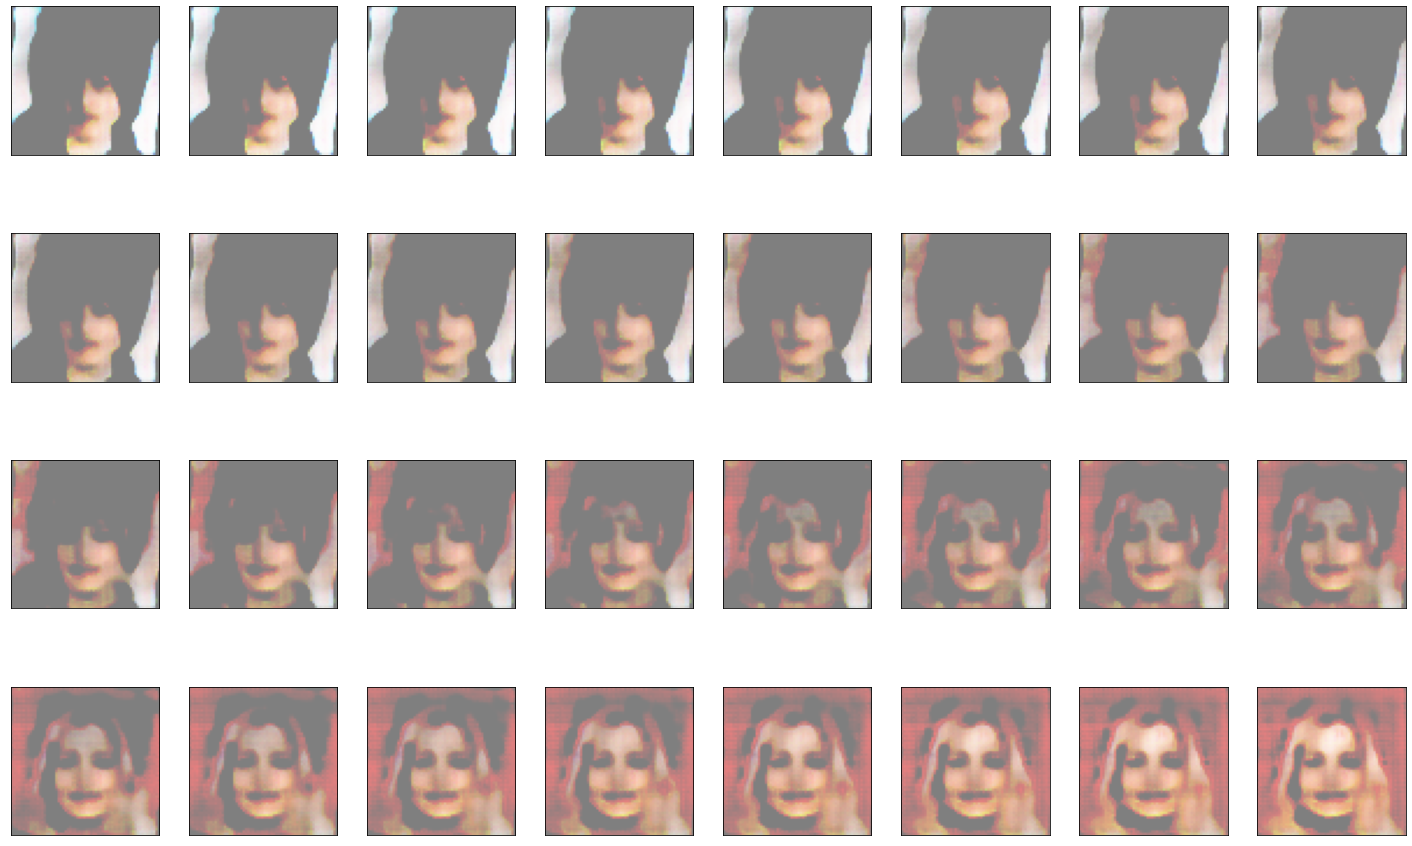

In [54]:
first_dog_idx = 0
second_dog_idx = 1

dz = (mu[second_dog_idx] - mu[first_dog_idx]) / 31
walk = Variable(torch.randn(32, latent_dim, 4, 4)).to(device)
walk[0] = mu[first_dog_idx]

for i in range(1, 32):
    walk[i] = walk[i-1] + dz
walk = model.decoder(walk).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(walk):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img+1.)/2.)


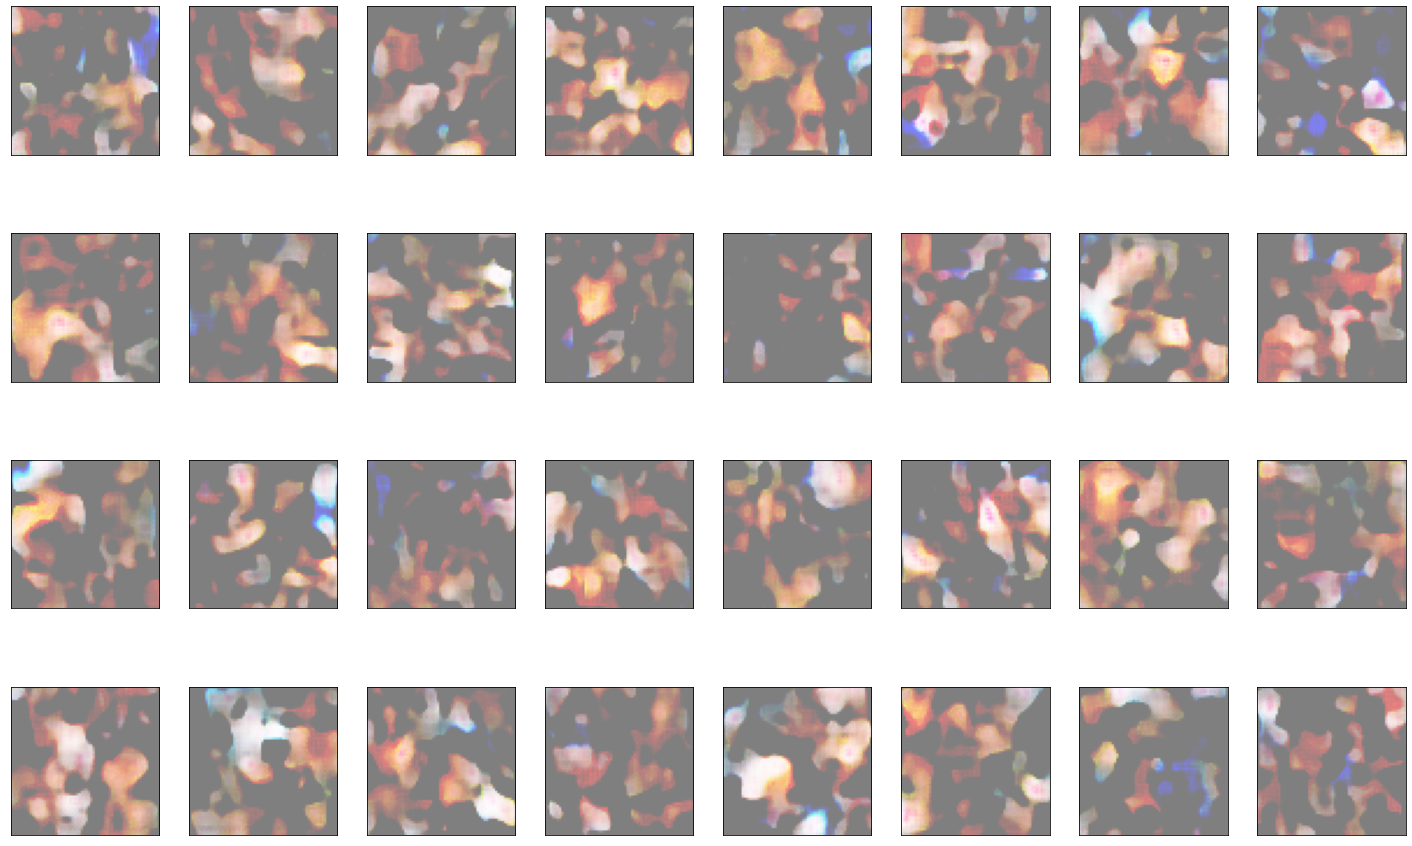

In [55]:
samples = Variable(torch.randn(32, latent_dim, 4, 4)).to(device)
samples = model.decoder(samples).detach().cpu().numpy().transpose(0, 2, 3, 1)

fig = plt.figure(figsize=(25, 16))
for ii, img in enumerate(samples):
    ax = fig.add_subplot(4, 8, ii + 1, xticks=[], yticks=[])
    plt.imshow((img+1.)/2.)

## Gerador de Sequências em Keras VAE - LSTM

In [119]:

import numpy as np
import matplotlib.pyplot as plt

from lstm_vae import create_lstm_vae, create_lstm_autoencoder

In [106]:
# read data from file
data = np.fromfile('sample_data.dat').reshape(419,13)
timesteps = 3
dataX = []
for i in range(len(data) - timesteps - 1):
    x = data[i:(i+timesteps), :]
    dataX.append(x)

np.array(dataX)

array([[[0.64931299, 0.89654163, 0.27325002, ..., 0.29347826,
         0.39893617, 0.2962963 ],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.3442029 ,
         0.41489362, 0.25925926],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.44927536,
         0.50531915, 0.27777778]],

       [[0.64931299, 0.89654163, 0.27325002, ..., 0.3442029 ,
         0.41489362, 0.25925926],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.44927536,
         0.50531915, 0.27777778],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.50724638,
         0.64893617, 0.27777778]],

       [[0.64931299, 0.89654163, 0.27325002, ..., 0.44927536,
         0.50531915, 0.27777778],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.50724638,
         0.64893617, 0.27777778],
        [0.64931299, 0.89654163, 0.27325002, ..., 0.48913043,
         0.67553191, 0.2962963 ]],

       ...,

       [[0.64699262, 0.62628437, 0.18880407, ..., 0.40942029,
         0.34042553, 0.33333333],
        [0.62593392, 

In [115]:
x = np.array(dataX)
print(x.shape)
print(x[1])

(415, 3, 13)
[[0.64931299 0.89654163 0.27325002 0.22932992 0.87211755 0.14258337
  0.28571429 0.31818182 0.96153846 0.71568627 0.3442029  0.41489362
  0.25925926]
 [0.64931299 0.89654163 0.27325002 0.22932992 0.87211755 0.14258337
  0.35714286 0.36931818 1.         0.83333333 0.44927536 0.50531915
  0.27777778]
 [0.64931299 0.89654163 0.27325002 0.22932992 0.87211755 0.14258337
  0.35714286 0.47727273 0.79230769 0.92156863 0.50724638 0.64893617
  0.27777778]]


In [134]:
input_dim = x.shape[-1] # 13
timesteps = x.shape[1] # 3
batch_size = 1

vae, enc, gen = create_lstm_vae(input_dim, 
    timesteps=timesteps, 
    batch_size=batch_size, 
    intermediate_dim=32,
    latent_dim=3,
    epsilon_std=1.)

vae.fit(x, x, epochs=20)

Epoch 1/20
415/415 [==============================] - 1s 3ms/step - loss: 0.2270
Epoch 2/20
415/415 [==============================] - 0s 852us/step - loss: 0.2046
Epoch 3/20
415/415 [==============================] - 0s 865us/step - loss: 0.1721
Epoch 4/20
415/415 [==============================] - 0s 848us/step - loss: 0.1415
Epoch 5/20
415/415 [==============================] - 0s 845us/step - loss: 0.1223
Epoch 6/20
415/415 [==============================] - 0s 849us/step - loss: 0.1103
Epoch 7/20
415/415 [==============================] - 0s 859us/step - loss: 0.1011
Epoch 8/20
415/415 [==============================] - 0s 858us/step - loss: 0.0931
Epoch 9/20
415/415 [==============================] - 0s 854us/step - loss: 0.0855
Epoch 10/20
415/415 [==============================] - 0s 864us/step - loss: 0.0785
Epoch 11/20
415/415 [==============================] - 0s 860us/step - loss: 0.0721
Epoch 12/20
415/415 [==============================] - 0s 880us/step - loss: 0.0661
Epo

In [135]:
# Gerando uma sequencia a partir de sequencias conhecidas

In [136]:
preds = vae.predict(x, batch_size=batch_size)

In [137]:
# plotando a sequencia original e sequencia gerada pela VAE

x: (415, 3, 13), preds: (415, 3, 13)


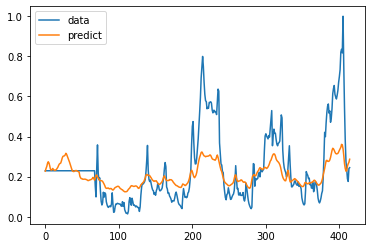

In [138]:
print("x: %s, preds: %s" % (x.shape, preds.shape))
plt.plot(x[:,0,3], label='data')
plt.plot(preds[:,0,3], label='predict')
plt.legend()
plt.show()

In [ ]:
# gerando sequencias a partir do espaço latente

In [155]:
n=5
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]
grid_z = np.linspace(-4, 4, n)[::-1]

dataXGen = []

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        for k, ki in enumerate(grid_x):
            z_sample = np.array([[xi, yi, ki]])
            x_decoded = gen.predict(z_sample)
            #print(x_decoded) 
            dataXGen.append(x_decoded)

res = np.array(dataXGen)
print(res.shape)


(125, 1, 3, 13)


In [120]:
input_dim = x.shape[-1] # 13
timesteps = x.shape[1] # 3
batch_size = 1
latent_dim=100

ae = create_lstm_autoencoder(input_dim, timesteps, latent_dim)
ae.fit(x, x, epochs=20)


Epoch 1/20
415/415 [==============================] - 1s 2ms/step - loss: 0.1990
Epoch 2/20
415/415 [==============================] - 0s 709us/step - loss: 0.1081
Epoch 3/20
415/415 [==============================] - 0s 640us/step - loss: 0.0474
Epoch 4/20
415/415 [==============================] - 0s 704us/step - loss: 0.0335
Epoch 5/20
415/415 [==============================] - 0s 648us/step - loss: 0.0276
Epoch 6/20
415/415 [==============================] - 0s 644us/step - loss: 0.0235
Epoch 7/20
415/415 [==============================] - 0s 591us/step - loss: 0.0206
Epoch 8/20
415/415 [==============================] - 0s 530us/step - loss: 0.0182
Epoch 9/20
415/415 [==============================] - 0s 609us/step - loss: 0.0164
Epoch 10/20
415/415 [==============================] - 0s 617us/step - loss: 0.0150
Epoch 11/20
415/415 [==============================] - 0s 601us/step - loss: 0.0139
Epoch 12/20
415/415 [==============================] - 0s 580us/step - loss: 0.0130
Epo

In [121]:
preds = ae.predict(x, batch_size=batch_size)

x: (415, 3, 13), preds: (415, 3, 13)


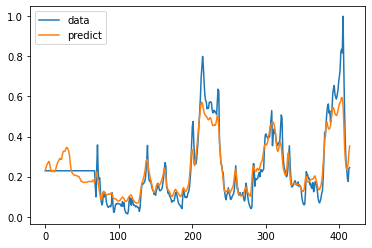

In [122]:
print("x: %s, preds: %s" % (x.shape, preds.shape))
plt.plot(x[:,0,3], label='data')
plt.plot(preds[:,0,3], label='predict')
plt.legend()
plt.show()